This notebook provides main Exploration and Visualisation insights based on customers credit history data.

## Assumed steps: 
**Data set basic analysis**
    - @TODO denote WARNING columns which has imbalanced distribution
    - @TODO add decoding of labels for pie charts e.g.: A13 - male, divorced  
**Customers statistical insights**

In [283]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [284]:
# util functions

def rename_columns(dataset: pd.DataFrame):
        """Rename dataframe columns names.
        Notes:
            target column names based on provided data_description.txt
        Returns:
            pd.DataFrame - dataframe with renamed columns 
        """
    
        target_columns = {
            'X01': 'account_status',
            'X06': 'account_savings',
            'X02': 'credit_duration',
            'X03': 'credit_history',
            'X04': 'credit_purpose',
            'X05': 'credit_amount',
            'X07': 'employment_status',
            'X17': 'employment_description',
            'X08': 'income_installment_rate',
            'X09': 'gender_status',
            'X10': 'credit_guarantors',
            'X11': 'residence',
            'X12': 'owned_property',
            'X13': 'age',
            'X14': 'installment_plans',
            'X15': 'accomondation_type',
            'X16': 'credit_existing_number',
            'X18': 'liable_maintain',
            'X19': 'phone_number',
            'X20': 'foreign_worker',
            'Y': 'y'
        }
        return dataset.rename(columns=target_columns)    

In [285]:
row_dataset = pd.read_csv('./dataset/project_data.csv', delimiter=';')
df = rename_columns(row_dataset) # we will rename encoded columns for better undersatnding of data set

df 

,account_status,credit_duration,credit_history,credit_purpose,credit_amount,account_savings,employment_status,income_installment_rate,gender_status,credit_guarantors,...,owned_property,age,installment_plans,accomondation_type,credit_existing_number,employment_description,liable_maintain,phone_number,foreign_worker,y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


### Data set basic analysis
    1. Explore data set in terms of categorical vs numerical columns
    2. Explore data set in terms of missing/nan values
    3. Explore data set in terms of values distribution (plot per each column)
        - @TODO denote WARNING columns which has imbalanced distribution
        - @TODO add decoding of labels for pie charts e.g.: A13 - male, divorced  

#### Explore data set in terms of categorical vs numerical columns (plot pie_chart)

Categorical cloumns: 13
Numerical cloumns: 8


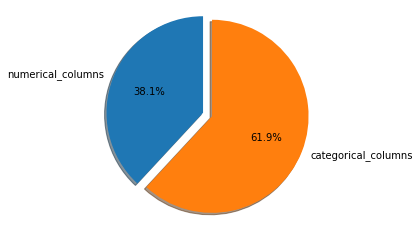

In [286]:
# Explore data set in terms of categorical vs numerical columns (plot pie_chart)
numerical_cols = list(df._get_numeric_data().columns)
categorical_cols = list(set(df.columns) - set(numerical_cols))

print(f'Categorical cloumns: {len(categorical_cols)}')
print(f'Numerical cloumns: {len(numerical_cols)}')

labels = ['numerical_columns', 'categorical_columns']
sizes = [len(numerical_cols), len(categorical_cols)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()


#### Explore data set in terms of missing/nan values 

In [287]:
# Explore data set in terms of missing/nan values 
nans = df.isnull().sum().sum()
print(f'Data set has {nans} missing values')

Data set has 0 missing values


#### Explore data set in terms of values distribution (plot per each column)
    - denote WARNING columns which has imbalanced distribution  

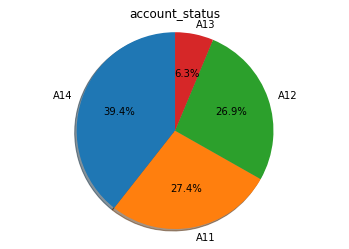

count     1000
unique       4
top        A14
freq       394
Name: account_status, dtype: object


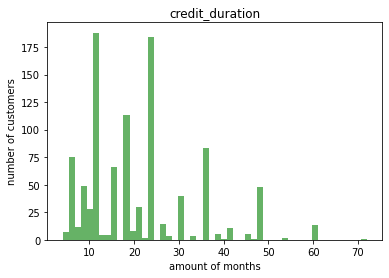

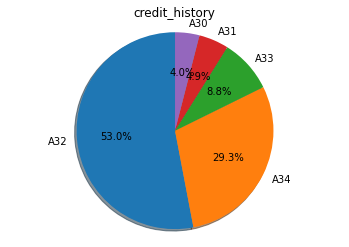

count     1000
unique       5
top        A32
freq       530
Name: credit_history, dtype: object


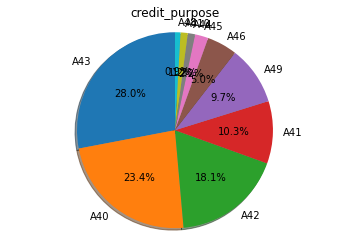

count     1000
unique      10
top        A43
freq       280
Name: credit_purpose, dtype: object


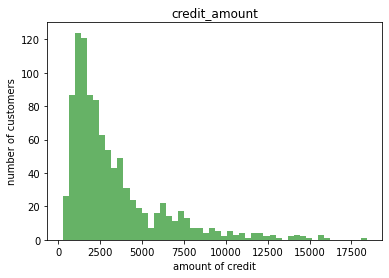

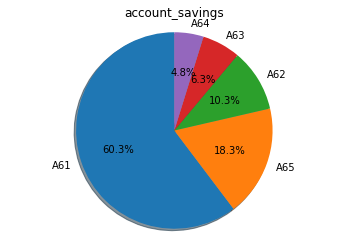

count     1000
unique       5
top        A61
freq       603
Name: account_savings, dtype: object


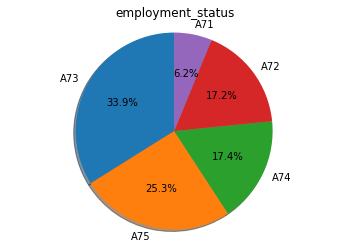

count     1000
unique       5
top        A73
freq       339
Name: employment_status, dtype: object


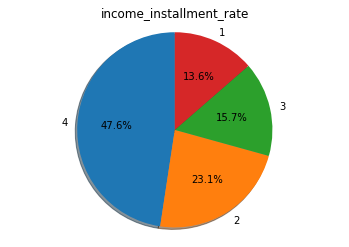

count    1000.000000
mean        2.973000
std         1.118715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: income_installment_rate, dtype: float64


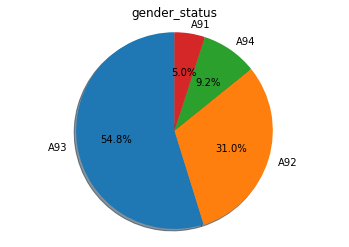

count     1000
unique       4
top        A93
freq       548
Name: gender_status, dtype: object


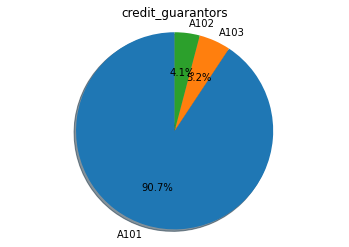

count     1000
unique       3
top       A101
freq       907
Name: credit_guarantors, dtype: object


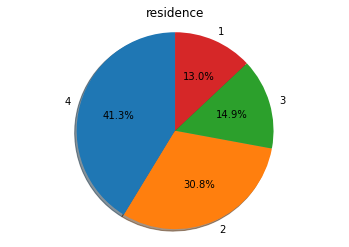

count    1000.000000
mean        2.845000
std         1.103718
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: residence, dtype: float64


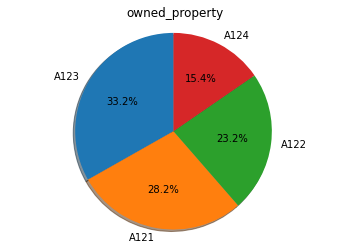

count     1000
unique       4
top       A123
freq       332
Name: owned_property, dtype: object


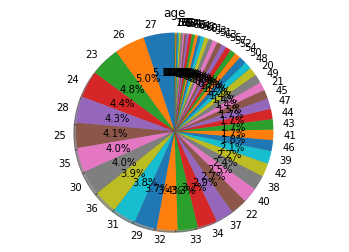

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64


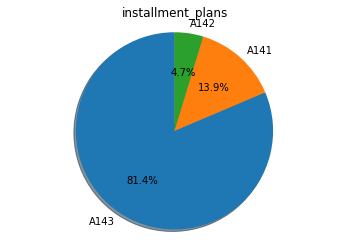

count     1000
unique       3
top       A143
freq       814
Name: installment_plans, dtype: object


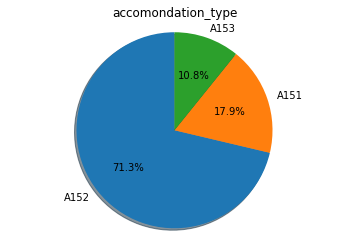

count     1000
unique       3
top       A152
freq       713
Name: accomondation_type, dtype: object


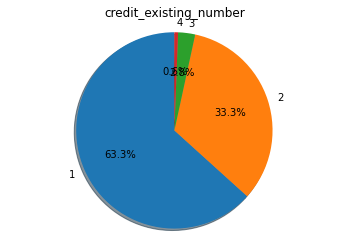

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: credit_existing_number, dtype: float64


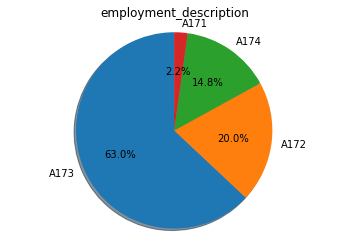

count     1000
unique       4
top       A173
freq       630
Name: employment_description, dtype: object


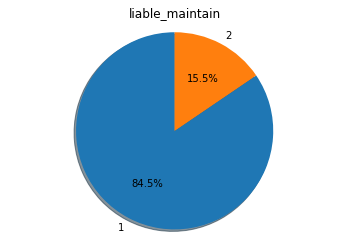

count    1000.000000
mean        1.155000
std         0.362086
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: liable_maintain, dtype: float64


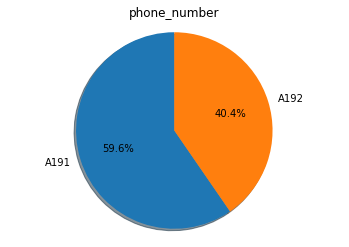

count     1000
unique       2
top       A191
freq       596
Name: phone_number, dtype: object


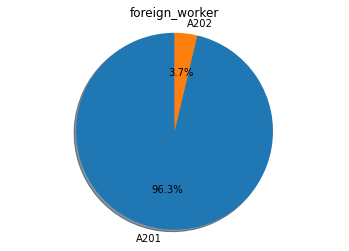

count     1000
unique       2
top       A201
freq       963
Name: foreign_worker, dtype: object


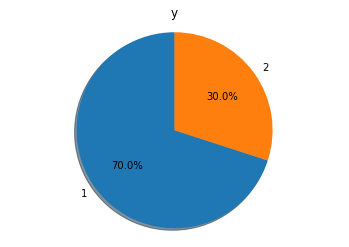

count    1000.000000
mean        1.300000
std         0.458487
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: y, dtype: float64


In [288]:
# Explore data set in terms of values distribution (plot per each column)
#    - denote WARNING columns which has imbalanced distribution  
    
for column in df.columns:    
    ### Explore data set in terms of values distribution (plot per each column)
    
    # exceptional cases, for them pie chart is uninformative  
    if column == 'credit_amount':
        plt.xlabel('amount of credit')
        plt.ylabel('number of customers')
        plt.title(column)
        plt.hist(df[column], bins=50, alpha=0.6, color='g')
        continue
        
    elif column == 'credit_duration':
        plt.xlabel('amount of months')
        plt.ylabel('number of customers')
        plt.title(column)
        plt.hist(df[column], bins=50, alpha=0.6, color='g')
        continue
    
    # other cases for pie chart     
    labels = [] # values in column
    sizes = [] # amount of value's entries   
    column_stats = list(df[column].value_counts().items()) # initially zip; e.g.: [('A14', 394), ('A11', 274), ('A12', 269), ('A13', 63)]
    
    for pair in column_stats:
        labels.append(str(pair[0])) # str because label
        sizes.append(pair[1]) # amount of values of corresponding  label 
        
    explode = (0, 0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  
    plt.title(column)
    
    plt.show()
    
    ### denote WARNING columns which has imbalanced distribution
    # The freq is the most common value’s frequency
    counts = df[column].describe()
    print(counts)

    

In [289]:
# Conclusion: 
# - data set has no misssing values 
# - data set has more categorical (13) rather than numerical (8) columns 
# - data set statistics per each column can be found via pie charts + histograms  

## Customers statistical insights
    - Gender based analysis
    - Highest Loans amount filtered by age
       --> looking for which loan {duration, amount} is mostly frequent per each age group 
    
    - Which purposes of credit are more frequent?
        
    - How often people with already existed credits make repeted loans?  

#### Gender and Age based analysis
    - What is the average age for male versus female?
    - What is the average loan duration for male versus female?
    - Max vs Min loans per gender
    - Which gender is more suiatable client (based on target)
    

Average age for Male vs Female customers
Male: 36.778260869565216
Female: 32.803225806451614
Good amount of Male customers vs Good amount of Female customers
499 vs 201
Bad amount of Male customers vs Bad amount of Female customers
191 vs 109


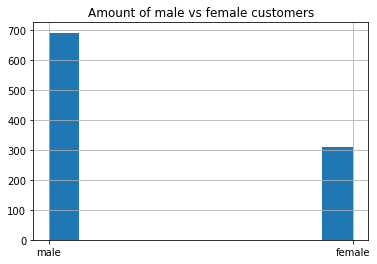

Male customers 690
Female customers 310


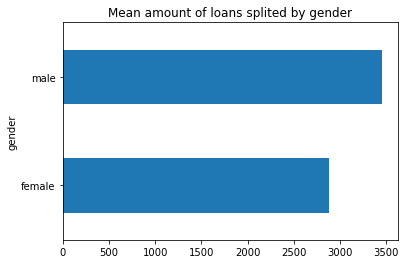

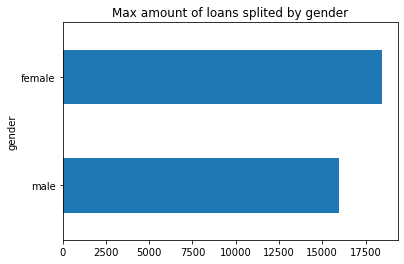

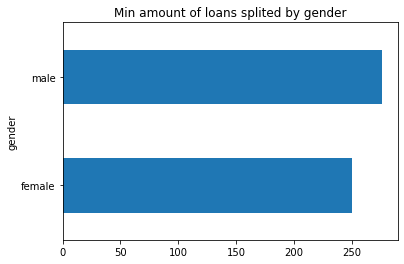

Average credit duration in terms of age


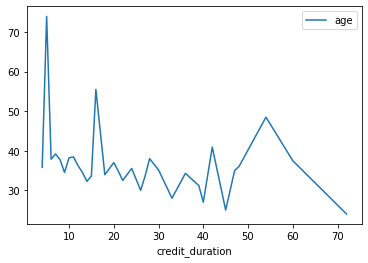

In [290]:
# add to dataframe dedicated genders by decoding "gender_status" column based on data description
"""
A91: male - divorced/separated
A92: female - divorced/separated/married
A93: male - single
A94: male - married/widowed
A95: female - single
"""

genders_dict = {'A91': 'male', 'A93': 'male', 'A94': 'male',
                'A92': 'female', 'A95': 'female'}

genders = df['gender_status'].map(genders_dict)
df['gender'] = genders


print('Average age for Male vs Female customers')
print(f"Male: {df[['age', 'gender']].groupby('gender').mean()['age'].male}")
print(f"Female: {df[['age', 'gender']].groupby('gender').mean()['age'].female}")

# Good Male vs Good Female customers
good_male = df[(df['gender'] == 'male') & (df['y'] == 1)]['y'].count()
bad_male = df[(df['gender'] == 'male') & (df['y'] == 2)]['y'].count()

good_female = df[(df['gender'] == 'female') & (df['y'] == 1)]['y'].count()
bad_female = df[(df['gender'] == 'female') & (df['y'] == 2)]['y'].count()
print('Good amount of Male customers vs Good amount of Female customers')
print(f'{good_male} vs {good_female}')

print('Bad amount of Male customers vs Bad amount of Female customers')
print(f'{bad_male} vs {bad_female}')

plt.title('Amount of male vs female customers')
df['gender'].hist();
plt.show()
print(f'Male customers {df[df["gender"] == "male"]["gender"].count()}');
print(f'Female customers {df[df["gender"] == "female"]["gender"].count()}');

plt.title('Mean amount of loans splited by gender')
df.groupby('gender')['credit_amount'].mean().sort_values().plot(kind='barh');
plt.show()

plt.title('Max amount of loans splited by gender')
df.groupby('gender')['credit_amount'].max().sort_values().plot(kind='barh');
plt.show()

plt.title('Min amount of loans splited by gender')
df.groupby('gender')['credit_amount'].min().sort_values().plot(kind='barh');
plt.show()

print('Average credit duration in terms of age')
df[['age', 'gender', 'credit_duration']].groupby('credit_duration').mean().plot();

# Consclusion
# - The amount of male customers (690) exceeds female customers (310)
# - Average age for Male (37 years) exceeds Female (33 years) in average of 4 years

# - Male GOOD customers (499) exceeds GOOD Female customers (201) 
# - Male BAD customers (191) as well exceeds BAD Female customers (109)

# BUT
# - In average male GOOD customers exceeds GOOD female in ~2.5 times when BAD male exceeds BAD female in ~1.1

# - In average male's amount of loan is more than female and equal ~3500
# - In average female's amount of loan is less than male and ~2700
# BUT
# - Average MAXIMUM female loan amount exceeds MAXIMUM male loan amount
# AND
# - Average MINIMUN male loan amount exceeds MINIMUM female loan amount 
# - In average elder people have shorter credit duration rather than younger people

### Higest Loans amount filtered by age
   - Min vs Max loans per each period --> looking for which loan {duration, amount} is mostly frequent per each age group 

In [293]:
row = df[['credit_duration', 'credit_amount', 'age']]

fig = px.scatter(df, x=df['credit_duration'], y=df['credit_amount'], color=df['age'],
                 size=df['credit_amount'], hover_data=[df['credit_duration']])
fig.show()

# Conclusion
# - In average the higest loan amount is taken from ~37 upto ~48 months 
#   by people in age group from 30 upto 45 years 

### Which purposes of credit are more frequent?
    - What femaleS make loan more frequently for?
    - What maleS make loan more frequently for?

In [294]:
row = df[['credit_purpose', 'credit_amount', 'age', 'gender']]

credit_purpose_dict = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}
row['credit_purpose'] = row['credit_purpose'].map(credit_purpose_dict)

print('The list of loans needs by desceding order: \n', row['credit_purpose'].value_counts())
print('The list of loans needs for male gender by desceding order: \n', row[row['gender'] == 'male']['credit_purpose'].value_counts())
print('The list of loans needs for female gender by desceding order: \n', row[row['gender'] == 'female']['credit_purpose'].value_counts())

# filtered by age
print('The list of loans needs for male gender by desceding order: \n', row[row['gender'] == 'male']['credit_purpose'].value_counts())
print('The list of loans needs for female gender by desceding order: \n', row[row['gender'] == 'female']['credit_purpose'].value_counts())

fig = px.scatter(row, x=row['credit_purpose'], y='credit_amount', color='age',
                 size='credit_amount', hover_data=['credit_purpose'])
fig.show()

# Conclusion
# - The list of ALL loans needs by desceding order per male AND female:
# radio/television       280
# car (new)              234
# furniture/equipment    181
# car (used)             103
# business                97
# education               50
# repairs                 22
# others                  12
# domestic appliances     12
# retraining               9

# - The TOP 5 list of loans needs for male gender by desceding order:
# radio/television       195
# car (new)              164
# furniture/equipment    107
# car (used)              79
# business                78

# - The TOP 5 list of loans needs for female gender by desceding order:
# radio/television       85
# furniture/equipment    74
# car (new)              70
# car (used)             24
# education              21
# business               19

The list of loans needs by desceding order: 
 radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
others                  12
domestic appliances     12
retraining               9
Name: credit_purpose, dtype: int64
The list of loans needs for male gender by desceding order: 
 radio/television       195
car (new)              164
furniture/equipment    107
car (used)              79
business                78
education               29
repairs                 17
others                   9
retraining               6
domestic appliances      6
Name: credit_purpose, dtype: int64
The list of loans needs for female gender by desceding order: 
 radio/television       85
furniture/equipment    74
car (new)              70
car (used)             24
education              21
business               19
domestic appliances     6
repairs                 5
retraining

/Users/macbook/miniconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [295]:
# MALE Statistics of age + credit amount + gender per each credit purpose group
row[row['gender'] == 'male'].groupby(['credit_purpose', 'age']).max()

credit_amount gender
credit_purpose age                      
business       21            6568   male
               23           15672   male
               24            2145   male
               25           14421   male
               26            5117   male
...                           ...    ...
retraining     27             937   male
               31            1410   male
               36            1238   male
               38             754   male
               45             339   male

[238 rows x 2 columns]

In [296]:
# FEMALE Statistics of age + credit amount + gender per each credit purpose group
row[row['gender'] == 'female'].groupby(['credit_purpose', 'age']).max()

credit_amount  gender
credit_purpose age                       
business       22             806  female
               23             841  female
               24            4308  female
               26            4280  female
               27            3609  female
...                           ...     ...
repairs        55            1190  female
               67            3872  female
retraining     35            3447  female
               39             932  female
               40             894  female

[148 rows x 2 columns]

### How often people with already existed credits make repeted loans? 